In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
words_df = pd.read_csv('words.csv', header=None, names=['word'])
rounds_df = pd.read_csv('rounds_in_games.csv')
games_df = pd.read_csv('games.csv')


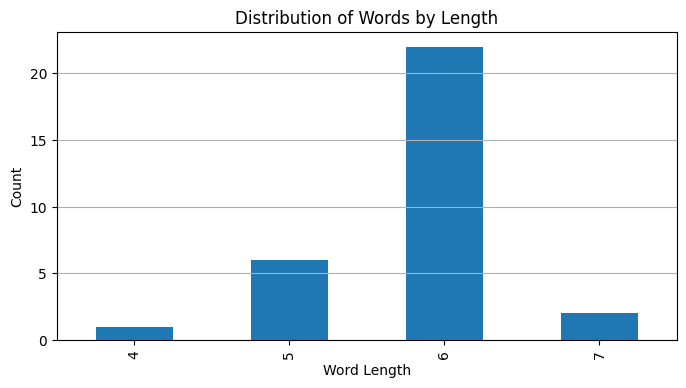

In [11]:
words_df['length'] = words_df['word'].str.len()
length_counts = words_df['length'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
length_counts.plot(kind='bar')
plt.title('Distribution of Words by Length')
plt.xlabel('Word Length')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


In [12]:
unique_users = rounds_df['username'].nunique()
print(f"Total unique users: {unique_users}")


Total unique users: 2


In [13]:
top_winners = rounds_df[rounds_df['victory'] == True] \
    .groupby('username').size().sort_values(ascending=False).head(5)
print("Top 5 users with most rounds won:")
print(top_winners)


Top 5 users with most rounds won:
username
Adam    1
adam    1
dtype: int64


In [14]:
top_total_scores = games_df.groupby('username')['final_score'] \
    .sum().sort_values(ascending=False).head(5)
print("Top 5 users by total score:")
print(top_total_scores)


Top 5 users by total score:
username
Adam    1
adam    1
Name: final_score, dtype: int64


In [15]:
top_avg_scores = games_df.groupby('username')['final_score'] \
    .mean().sort_values(ascending=False).head(5)
print("Top 5 users by average score:")
print(top_avg_scores)


Top 5 users by average score:
username
Adam    1.0
adam    1.0
Name: final_score, dtype: float64


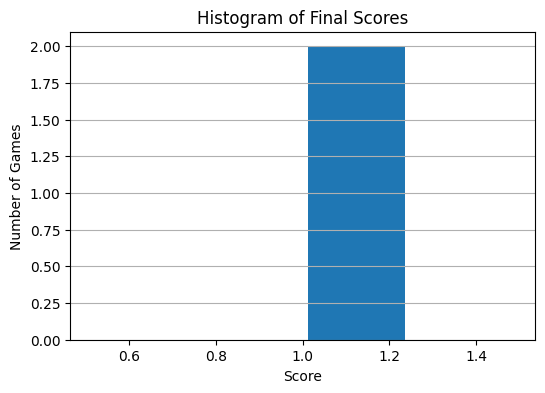

In [16]:
plt.figure(figsize=(6, 4))
games_df['final_score'].plot(kind='hist', bins=4, rwidth=0.9)
plt.title('Histogram of Final Scores')
plt.xlabel('Score')
plt.ylabel('Number of Games')
plt.grid(axis='y')
plt.show()


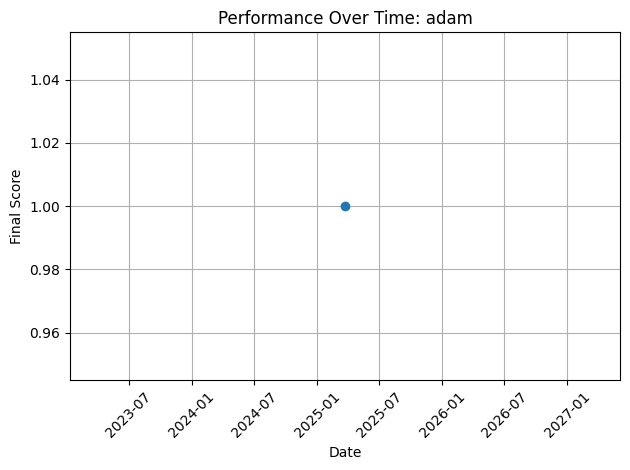

In [17]:
# Convert end_date to datetime for sorting
games_df['end_date'] = pd.to_datetime(games_df['end_date'])

# Filter by user
selected_user = 'adam'  # change as needed
user_games = games_df[games_df['username'] == selected_user].sort_values('end_date')

# Line plot
plt.plot(user_games['end_date'], user_games['final_score'], marker='o')
plt.title(f"Performance Over Time: {selected_user}")
plt.xlabel("Date")
plt.ylabel("Final Score")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


In [19]:
summary_df = games_df.groupby('username')['final_score'].agg(['count', 'sum', 'mean']).reset_index()
summary_df.columns = ['username', 'games_played', 'total_score', 'avg_score']
summary_df.to_excel("user_statistics.xlsx", index=False)

In [20]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('score_distribution.pdf') as pdf:
    games_df['final_score'].plot(kind='hist', bins=4, rwidth=0.9)
    plt.title('Histogram of Final Scores')
    plt.xlabel('Score')
    plt.ylabel('Number of Games')
    plt.grid(axis='y')
    pdf.savefig()
    plt.close()
